In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math
import numpy as np

In [2]:
#I tried a different encoding because utf-8 wasn't working
df = pd.read_csv('../Tyre/tyre2019-2024.csv', encoding="ISO-8859-1")
# expand each row based on the number of laps from 'From' to 'To'
expanded_rows = []

for _, row in df.iterrows():
    for lap in range(row['From'], row['To'] + 1):
        # create a new row for each lap
        expanded_row = row.copy()
        expanded_row['Lap'] = lap  
        # add the lap number as a new column
        expanded_rows.append(expanded_row)

# create a new DataFrame with the expanded rows
df_tyre_2020 = pd.DataFrame(expanded_rows)

# drop the original 'From' and 'To' columns as they are now represented by individual lap entries
df_tyre_2020.drop(['From', 'To', 'Unnamed: 7'], axis=1, inplace=True)
df_tyre_2020.to_csv('expanded_tyre_data.csv', index=False)
print(df_tyre_2020.head())

            Driver         GP      Tyres  #Laps  Year  Lap
0  Valtteri Bottas  Australia  Soft Used     23  2019    1
0  Valtteri Bottas  Australia  Soft Used     23  2019    2
0  Valtteri Bottas  Australia  Soft Used     23  2019    3
0  Valtteri Bottas  Australia  Soft Used     23  2019    4
0  Valtteri Bottas  Australia  Soft Used     23  2019    5


In [3]:
df_tyre_2020 = df_tyre_2020.drop(columns=['#Laps'])
df_tyre_2020.head(5)


,Driver,GP,Tyres,Year,Lap
0,Valtteri Bottas,Australia,Soft Used,2019,1
0,Valtteri Bottas,Australia,Soft Used,2019,2
0,Valtteri Bottas,Australia,Soft Used,2019,3
0,Valtteri Bottas,Australia,Soft Used,2019,4
0,Valtteri Bottas,Australia,Soft Used,2019,5


In [4]:
#data cleaning
df_tyre_2020 = df_tyre_2020.dropna()
df_tyre_2020.isna().sum()

Driver    0
GP        0
Tyres     0
Year      0
Lap       0
dtype: int64

In [5]:
df_tyre_2020.shape
# getting basic attributes of dataset

(134961, 5)

In [6]:
df_tyre_2020.describe()
# making sure values seems reasonable

,Year,Lap
count,134961.000000,134961.000000
mean,2021.523307,30.562844
std,1.697716,18.444829
min,2019.000000,1.000000
25%,2020.000000,15.000000
50%,2022.000000,30.000000
75%,2023.000000,45.000000
max,2024.000000,87.000000


In [7]:
df_tyre_2020.head(5)

,Driver,GP,Tyres,Year,Lap
0,Valtteri Bottas,Australia,Soft Used,2019,1
0,Valtteri Bottas,Australia,Soft Used,2019,2
0,Valtteri Bottas,Australia,Soft Used,2019,3
0,Valtteri Bottas,Australia,Soft Used,2019,4
0,Valtteri Bottas,Australia,Soft Used,2019,5


In [8]:
df_weather_2020 = pd.read_csv('weather_2019.csv')

In [9]:
df_weather_2020.rename(columns={'LapNumber': 'Lap'}, inplace=True)
df_weather_2020['Lap'] = df_weather_2020['Lap'].astype(int)
#this renames Lapnumber to Lap to make it easier during mergins
#this also makes all float lap values into integers for easier merging

In [10]:
df_weather_2020.head(5)

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Lap,Driver
0,0 days 00:00:56.546000,23.3,66.9,1016.8,False,40.2,204,1.1,1,HAM
1,0 days 00:01:56.728000,23.4,66.9,1016.7,False,40.2,193,1.5,1,HAM
2,0 days 00:02:56.521000,23.6,66.1,1016.7,False,40.4,147,1.0,1,HAM
3,0 days 00:03:56.540000,23.7,65.4,1016.7,False,40.4,177,1.2,1,HAM
4,0 days 00:04:56.547000,23.7,65.9,1016.8,False,40.4,149,1.0,1,HAM


In [11]:
df_weather_2020.isna().sum()
#checking for missing values

Time             0
AirTemp          0
Humidity         0
Pressure         0
Rainfall         0
TrackTemp        0
WindDirection    0
WindSpeed        0
Lap              0
Driver           0
dtype: int64

In [12]:
df_weather_2020.describe()

,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Lap
count,67901.000000,67901.000000,67901.000000,67901.000000,67901.000000,67901.000000,67901.000000
mean,23.090542,52.742917,990.900474,37.238462,171.241234,1.781414,19.188274
std,4.015444,16.957516,48.848688,8.497937,103.775467,1.098546,19.167852
min,14.600000,12.900000,779.700000,25.100000,0.000000,0.000000,1.000000
25%,20.700000,45.300000,989.000000,29.400000,86.000000,1.000000,1.000000
50%,22.000000,54.500000,1008.900000,35.200000,174.000000,1.500000,12.000000
75%,25.700000,64.600000,1015.400000,43.200000,254.000000,2.200000,33.000000
max,35.300000,90.300000,1023.700000,57.400000,359.000000,7.900000,78.000000


In [13]:
df_tyre_2020['Driver'] = df_tyre_2020['Driver'].apply(
    lambda x: x.split()[-1][:3].upper() if isinstance(x, str) else x
)
df_tyre_2020.head(10)
#this is converting the full driver names to the first three letters of the second name
#this makes it easier to concatenate with weather data

,Driver,GP,Tyres,Year,Lap
0,BOT,Australia,Soft Used,2019,1
0,BOT,Australia,Soft Used,2019,2
0,BOT,Australia,Soft Used,2019,3
0,BOT,Australia,Soft Used,2019,4
0,BOT,Australia,Soft Used,2019,5
0,BOT,Australia,Soft Used,2019,6
0,BOT,Australia,Soft Used,2019,7
0,BOT,Australia,Soft Used,2019,8
0,BOT,Australia,Soft Used,2019,9
0,BOT,Australia,Soft Used,2019,10


In [14]:
# merge on LapNumber and Driver with a left join to keep all weather data and corresponding tyre data
df_merged = pd.merge(df_weather_2020, df_tyre_2020, how='left', on=['Lap', 'Driver'])
df_merged.to_csv('merged_weather_tyre_data_2020.csv', index=False)
print(df_merged.head())


                     Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0  0 days 00:00:56.546000     23.3      66.9    1016.8     False       40.2   
1  0 days 00:00:56.546000     23.3      66.9    1016.8     False       40.2   
2  0 days 00:00:56.546000     23.3      66.9    1016.8     False       40.2   
3  0 days 00:00:56.546000     23.3      66.9    1016.8     False       40.2   
4  0 days 00:00:56.546000     23.3      66.9    1016.8     False       40.2   

   WindDirection  WindSpeed  Lap Driver          GP        Tyres    Year  
0            204        1.1    1    HAM   Australia    Soft Used  2019.0  
1            204        1.1    1    HAM     Bahrain    Soft Used  2019.0  
2            204        1.1    1    HAM       China  Medium Used  2019.0  
3            204        1.1    1    HAM  Azerbaijan    Soft Used  2019.0  
4            204        1.1    1    HAM       Spain    Soft Used  2019.0  


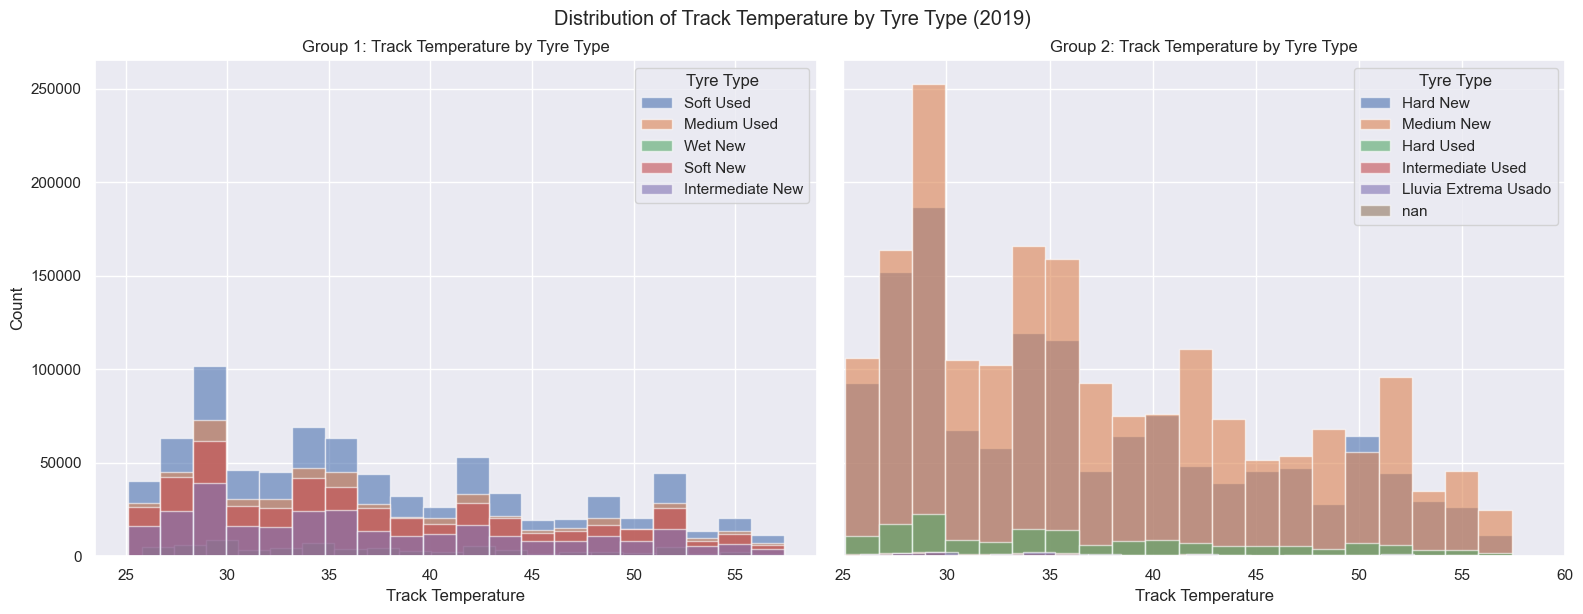

In [15]:
# Split tyre types into two groups
tyre_types = df_merged['Tyres'].unique()
group_1 = tyre_types[:len(tyre_types)//2]
group_2 = tyre_types[len(tyre_types)//2:]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Group 1
for tyre in group_1:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[0].hist(subset['TrackTemp'].dropna(), bins=20, alpha=0.6, label=str(tyre))
axes[0].set_title('Group 1: Track Temperature by Tyre Type')
axes[0].set_xlabel('Track Temperature')
axes[0].set_ylabel('Count')
axes[0].legend(title='Tyre Type', loc='upper right')

# Plot Group 2
for tyre in group_2:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[1].hist(subset['TrackTemp'].dropna(), bins=20, alpha=0.6, label=str(tyre))
axes[1].set_title('Group 2: Track Temperature by Tyre Type')
axes[1].set_xlabel('Track Temperature')
axes[1].legend(title='Tyre Type', loc='upper right')
axes[1].set_xlim(25, 60)

# Adjust layout and display the plot
plt.tight_layout()
plt.suptitle('Distribution of Track Temperature by Tyre Type (2019)', y=1.02)
plt.show()

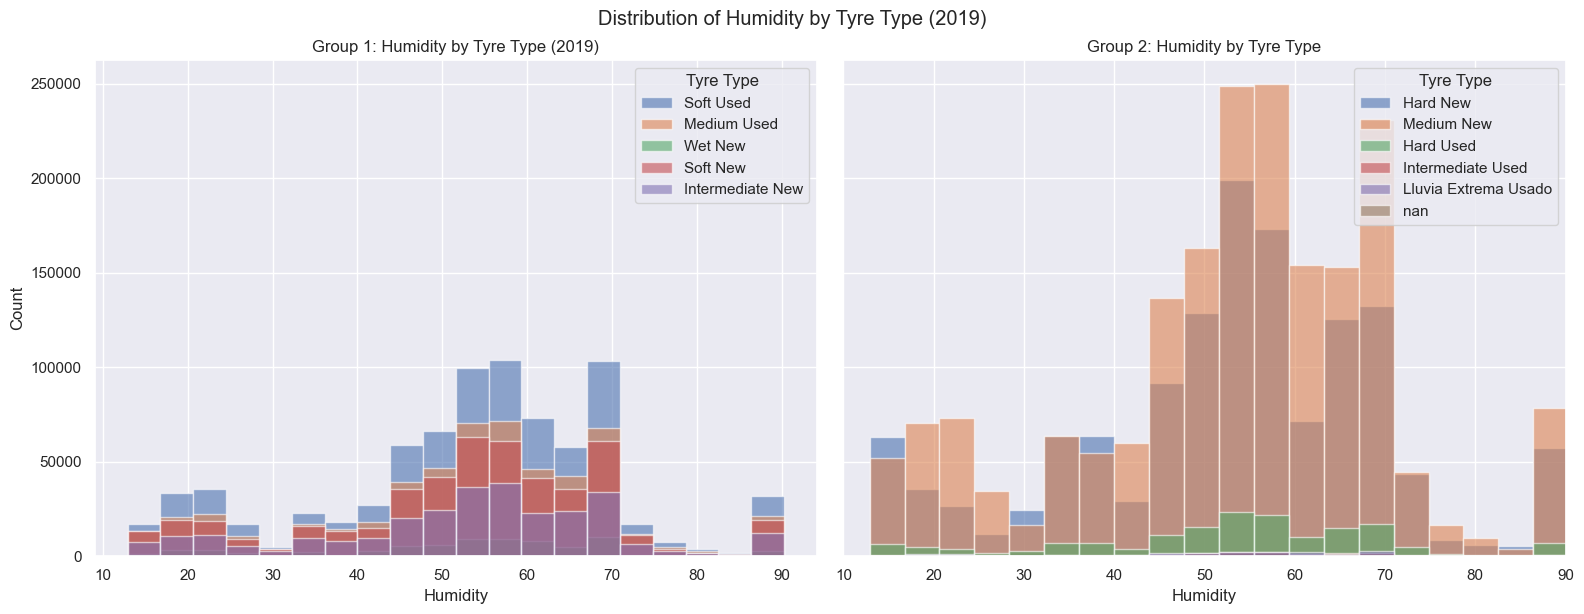

In [16]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Group 1
for tyre in group_1:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[0].hist(subset['Humidity'].dropna(), bins=20, alpha=0.6, label=str(tyre))
axes[0].set_title('Group 1: Humidity by Tyre Type (2019)')
axes[0].set_xlabel('Humidity')
axes[0].set_ylabel('Count')
axes[0].legend(title='Tyre Type', loc='upper right')

# Plot Group 2
for tyre in group_2:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[1].hist(subset['Humidity'].dropna(), bins=20, alpha=0.6, label=str(tyre))
axes[1].set_title('Group 2: Humidity by Tyre Type')
axes[1].set_xlabel('Humidity')
axes[1].legend(title='Tyre Type', loc='upper right')
axes[1].set_xlim(10, 90)

# Adjust layout and display the plot
plt.tight_layout()
plt.suptitle('Distribution of Humidity by Tyre Type (2019)', y=1.02)
plt.show()

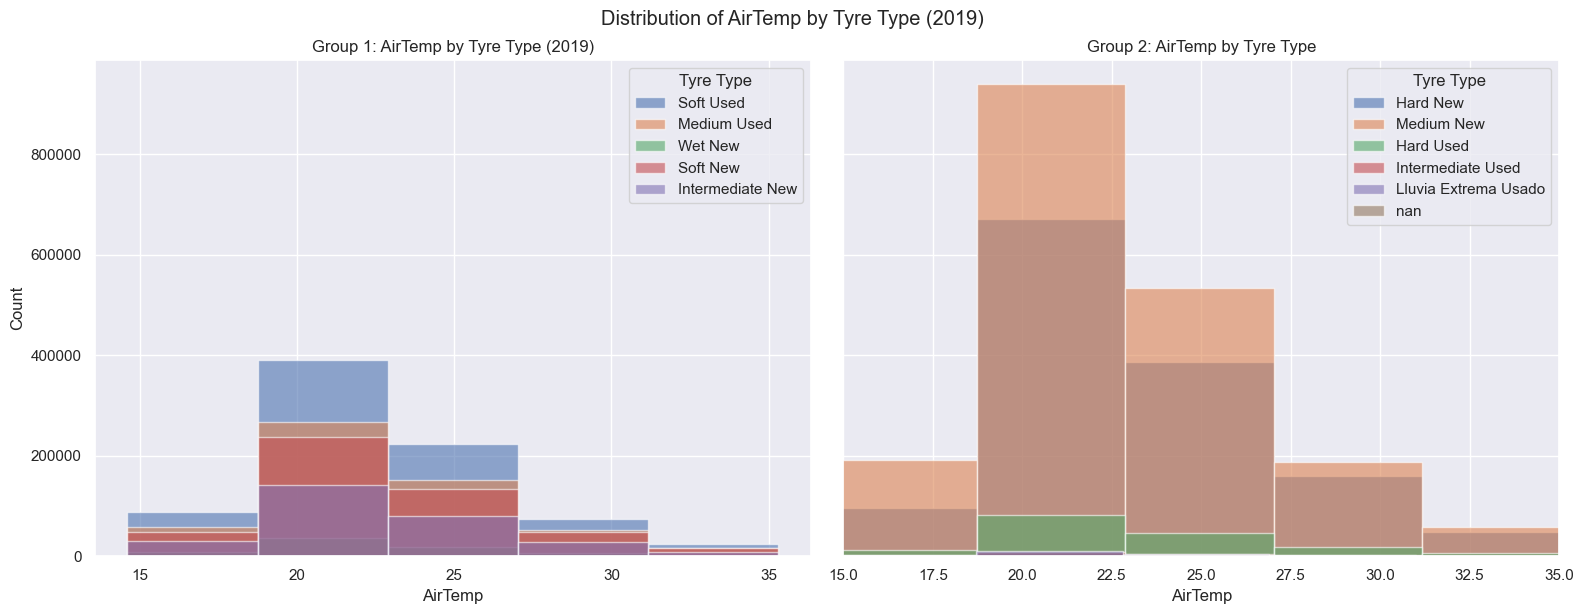

In [17]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Group 1
for tyre in group_1:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[0].hist(subset['AirTemp'].dropna(), bins=5, alpha=0.6, label=str(tyre))
axes[0].set_title('Group 1: AirTemp by Tyre Type (2019)')
axes[0].set_xlabel('AirTemp')
axes[0].set_ylabel('Count')
axes[0].legend(title='Tyre Type', loc='upper right')

# Plot Group 2
for tyre in group_2:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[1].hist(subset['AirTemp'].dropna(), bins=5, alpha=0.6, label=str(tyre))
axes[1].set_title('Group 2: AirTemp by Tyre Type')
axes[1].set_xlabel('AirTemp')
axes[1].legend(title='Tyre Type', loc='upper right')
axes[1].set_xlim(15, 35)

# Adjust layout and display the plot
plt.tight_layout()
plt.suptitle('Distribution of AirTemp by Tyre Type (2019)', y=1.02)
plt.show()

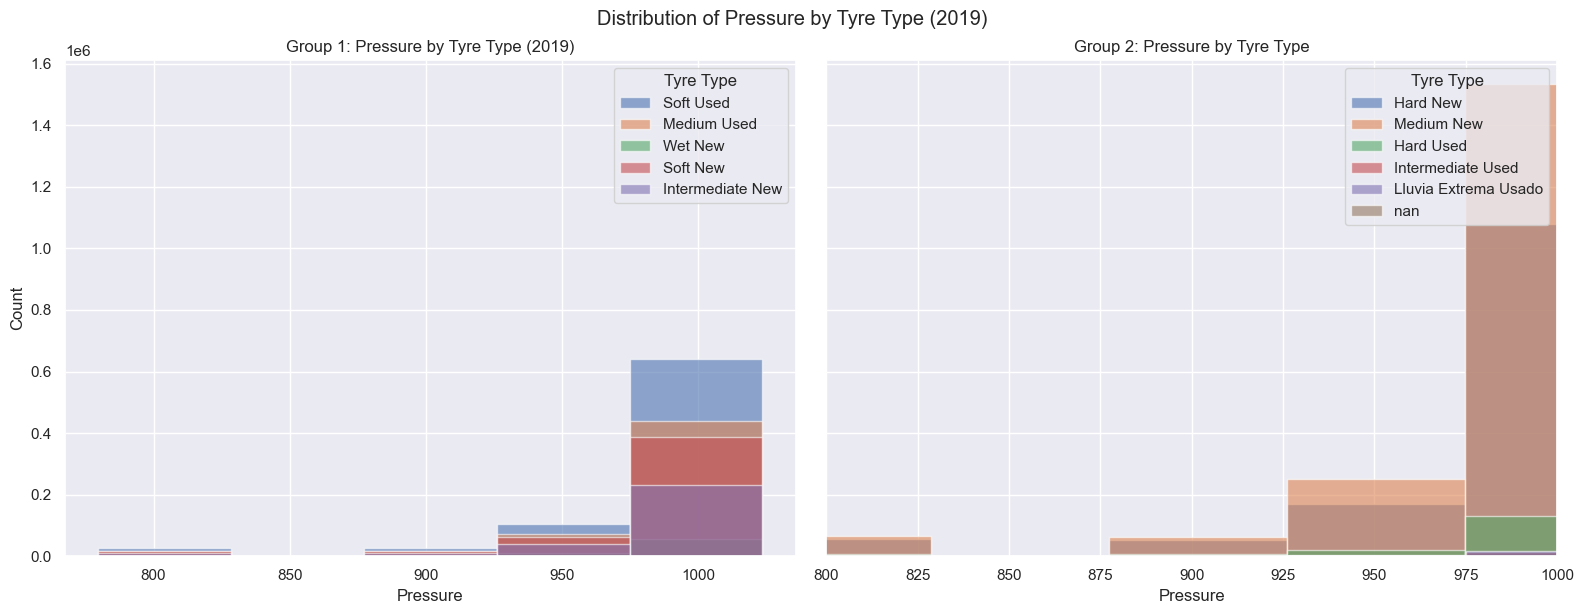

In [18]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Group 1
for tyre in group_1:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[0].hist(subset['Pressure'].dropna(), bins=5, alpha=0.6, label=str(tyre))
axes[0].set_title('Group 1: Pressure by Tyre Type (2019)')
axes[0].set_xlabel('Pressure')
axes[0].set_ylabel('Count')
axes[0].legend(title='Tyre Type', loc='upper right')

# Plot Group 2
for tyre in group_2:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[1].hist(subset['Pressure'].dropna(), bins=5, alpha=0.6, label=str(tyre))
axes[1].set_title('Group 2: Pressure by Tyre Type')
axes[1].set_xlabel('Pressure')
axes[1].legend(title='Tyre Type', loc='upper right')
axes[1].set_xlim(800, 1000)

# Adjust layout and display the plot
plt.tight_layout()
plt.suptitle('Distribution of Pressure by Tyre Type (2019)', y=1.02)
plt.show()

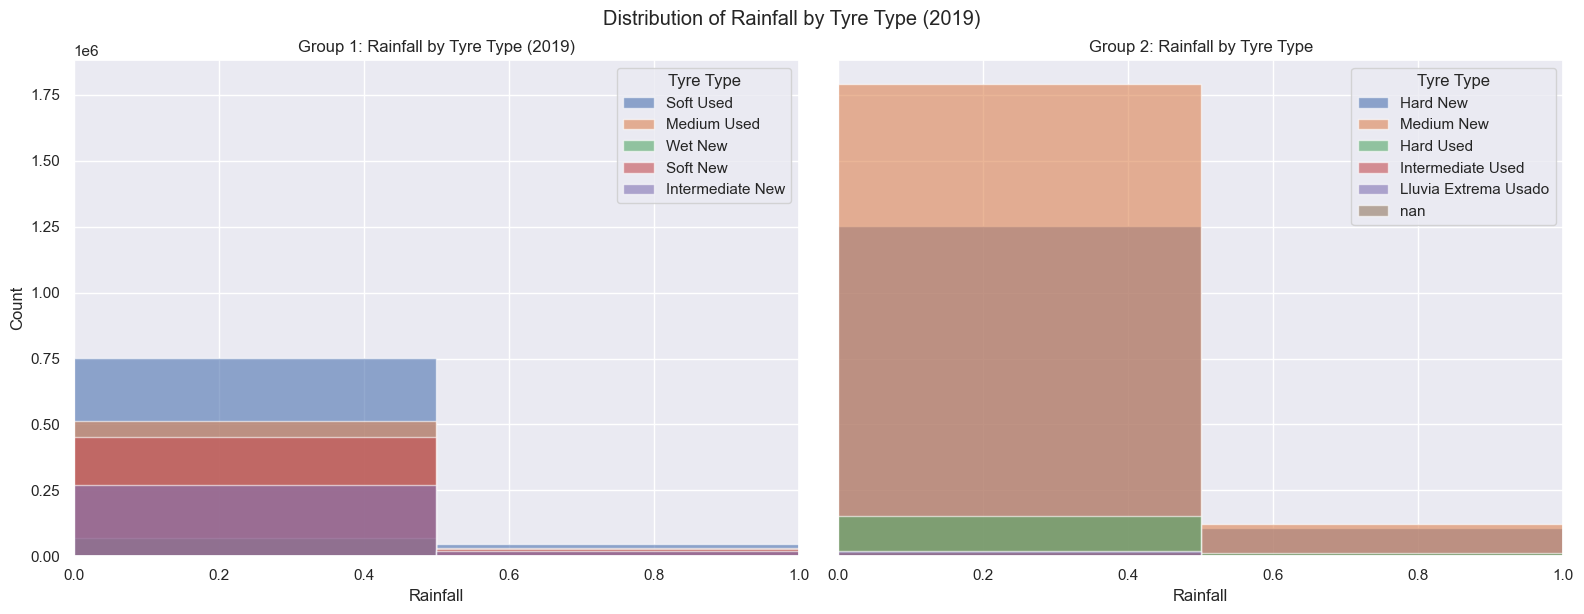

In [19]:
#switched boolean to ints to make it easier (true - 1, false - 0)
df_merged['Rainfall'] = np.where(df_merged['Rainfall'], 1, 0)
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Group 1
for tyre in group_1:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[0].hist(subset['Rainfall'].dropna(), bins=2, alpha=0.6, label=str(tyre))
axes[0].set_title('Group 1: Rainfall by Tyre Type (2019)')
axes[0].set_xlabel('Rainfall')
axes[0].set_ylabel('Count')
axes[0].legend(title='Tyre Type', loc='upper right')
axes[0].set_xlim(0, 1)

# Plot Group 2
for tyre in group_2:
    subset = df_merged[df_merged['Tyres'] == tyre]
    axes[1].hist(subset['Rainfall'].dropna(), bins=2, alpha=0.6, label=str(tyre))
axes[1].set_title('Group 2: Rainfall by Tyre Type')
axes[1].set_xlabel('Rainfall')
axes[1].legend(title='Tyre Type', loc='upper right')
axes[1].set_xlim(0, 1)

# Adjust layout and display the plot
plt.tight_layout()
plt.suptitle('Distribution of Rainfall by Tyre Type (2019)', y=1.02)
plt.show()